<a href="https://colab.research.google.com/github/abhishek-parashar/Reddit-flair-detection/blob/master/scripts/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required libraries for analysis and visualisation 


In [43]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import datetime as dt
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

## loading the data

In [0]:
data=pd.read_csv('datafinal.csv')

looking for the data shape 

In [8]:
data.shape

(1218, 12)

names of columns

In [9]:
data.columns

Index(['Unnamed: 0', 'flair', 'title', 'score', 'id', 'url', 'comms_num',
       'body', 'author', 'comments', 'timestamp', 'combined_features'],
      dtype='object')

It's clearly obvious unnamed: 0 and id have no use in the data so dropping them 


In [0]:
data.drop('id',axis=1,inplace=True)

In [0]:
data.drop('Unnamed: 0', axis=1, inplace= True )

In [12]:
data.shape

(1218, 10)

obtaining the first 5 rows of data

In [13]:
data.head()

,flair,title,score,url,comms_num,body,author,comments,timestamp,combined_features
0,AskIndia,4 days ago pending orders 100 million hydroxyc...,93,https://www.reddit.com/r/india/comments/fwjdqr...,6,getting frantic calls pharma customers delayed...,india_ko_vanakkam,modi stockholm syndrome fair evidence chloroqu...,2020-04-07 20:07:04,4 days ago pending orders 100 million hydroxyc...
1,AskIndia,randians big time users dating apps like tinde...,18,https://www.reddit.com/r/india/comments/fizkkk...,19,id stint apps couple months one point didnt fe...,__knockknockturnal__,someone matched tell im fat cat 1 general foll...,2020-03-15 18:48:06,randians big time users dating apps like tinde...
2,AskIndia,r india thinks flat earthers,7,https://www.reddit.com/r/india/comments/f25vx0...,31,encountered foreigner ig says round earth hoax...,Dev1003,havent found indian yet believes earth flat de...,2020-02-11 17:10:55,r india thinks flat earthershavent found india...
3,AskIndia,people left 9 5 jobs pursue career music art f...,44,https://www.reddit.com/r/india/comments/dtvliq...,34,couldnt add askindia flair mobile browser,c0mrade34,engineer advertisement shoots since last 1year...,2019-11-09 20:57:35,people left 9 5 jobs pursue career music art f...
4,AskIndia,somebody want kill full family,97,https://www.reddit.com/r/india/comments/b7pvwt...,24,24hrs local police station register case dont ...,amitkumarthakur,calm downgo sp office town file grievance imme...,2019-04-01 01:00:35,somebody want kill full familycalm downgo sp o...


getting data inforation 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   flair              1218 non-null   object
 1   title              1218 non-null   object
 2   score              1218 non-null   int64 
 3   url                1218 non-null   object
 4   comms_num          1218 non-null   int64 
 5   body               693 non-null    object
 6   author             1218 non-null   object
 7   comments           1096 non-null   object
 8   timestamp          1218 non-null   object
 9   combined_features  1218 non-null   object
dtypes: int64(2), object(8)
memory usage: 95.3+ KB


### by this we find that body has a lot of null values. This shows that for most of the posts only the title suffice, there is no need of body. 
### plots can be made for the posts having body and no of words in such posts this would give more insights to the data. 
### second in the list which has missing values is comments. This is quite resonable as not all the posts get comments, next thing which can be checked is what is the score of the post with comments and what flair are the posts which get maximum comments. 


#### graphs which we can plot to get more insights of the data 
#### 1. plots of different feature values and which feature value has missing values.
#### 2. NO of posts and the flair they belong that have body.
#### 3. No of words in the body corresponding to the flairs- this will help us determine is body a good parameter or not for model.
#### 4. score of the posts with comments
#### 5. flair which gets maximum comments - this will help us in model 
#### 6. what are thw words or persons mentioned maximum times in comments
#### 7, what is the frequency of posts and comments.
#### 8. what are the embeddings of different words in body, title, comments and combined features

one more insight which we can do is 

In [16]:
data['flair'].value_counts()

Food                  100
AskIndia              100
Science/Technology    100
Politics              100
AMA                   100
Non-Political         100
Coronavirus           100
Photography           100
Business/Finance      100
Scheduled             100
Policy/Economy        100
Sports                100
[R]eddiquette          18
Name: flair, dtype: int64

This tells us two thing:-
###### First the data is mostly balanced 
###### second [R]eddiquette has minimum no of posts this is may be because not most of the people post in ediquette section or things concerning this

In [0]:
# converting to data frame
df=pd.DataFrame(data)

In [0]:
y=data.columns

In [0]:
x=data.count()

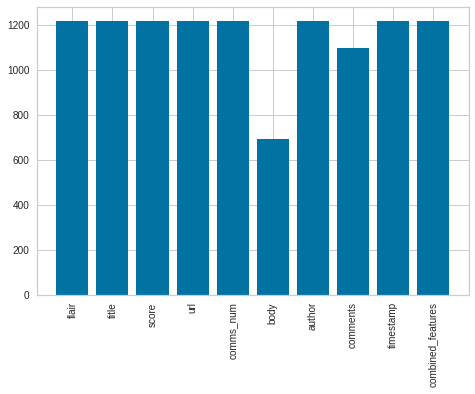

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
features = y 
values = x
ax.bar(y,x)
plt.xticks(rotation=90)
plt.savefig('value.png', dpi=300, bbox_inches='tight')
plt.show()

## getting no of words in title

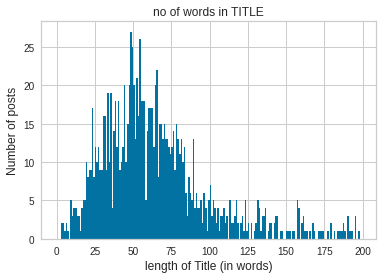

In [24]:
temp = df['title'].str.len()
temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")
plt.xlabel("length of Title (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)
plt.savefig('title.png', dpi=300, bbox_inches='tight')
plt.show()

this shows title is an important parameter and would affect our model 

## getting no of words in body

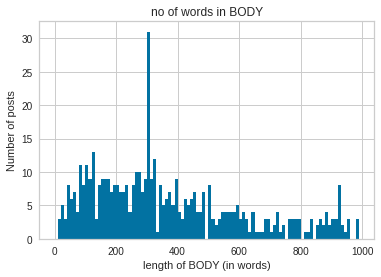

In [25]:

temp = df['body'].str.len()
temp.hist(bins = np.arange(0,1000,10))
plt.title("no of words in BODY")
plt.xlabel("length of BODY (in words)")
plt.ylabel("Number of posts")
plt.savefig('lenth of words in body.png', dpi=300, bbox_inches='tight')
plt.show()

this shows body is not an important parameter 

## visualising how the flairs fare according to the comments no and score
###### score is calculated by subtracting no of downvotes fro no of upvotes

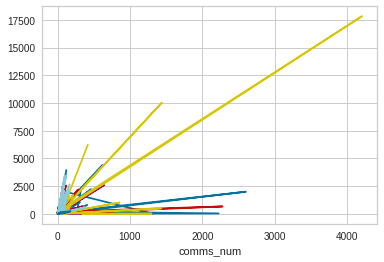

In [26]:
fig,ax = plt.subplots()
ax.grid()
df.groupby('flair').plot(x='comms_num', y='score', ax=ax, legend=False)
plt.savefig('comments and upvotes corresponding to the flairs', dpi=300, bbox_inches='tight')
plt.show()

flairs vs upvotes

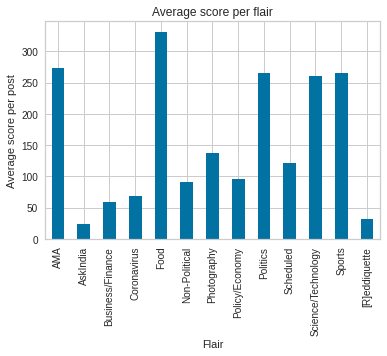

In [27]:
df2 = df.groupby("flair").mean()[['score']]

df2.plot(kind='bar', legend=False, grid=True)
plt.title("Average score per flair")

plt.xlabel("Flair")
plt.ylabel("Average score per post")
plt.savefig('score per flair', dpi=300, bbox_inches='tight')
plt.show()


this shows food gets a lot of upvotes probably because we indians are foodies XD.
sports and science and technology get a lot of upvotes, same as poilitics this shows indians are least interested in major topics like corona virus, policy economy

comments per flair

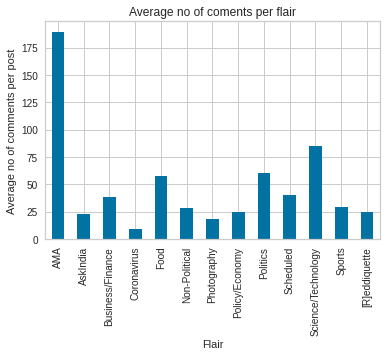

In [28]:
df3 = df.groupby("flair").mean()[['comms_num']]

df3.plot(kind='bar', legend=False, grid=True)
plt.title("Average no of coments per flair")

plt.xlabel("Flair")
plt.ylabel("Average no of comments per post")
plt.savefig('comms per flair', dpi=300, bbox_inches='tight')
plt.show()


this shows that Indians have a scientific temperament and also nterested in food, sports and politics 

## Let's look at how people post with time what is the frequency of differnt flairs

In [0]:
df4=df.set_index('timestamp')

no of comments per post during the time stamp

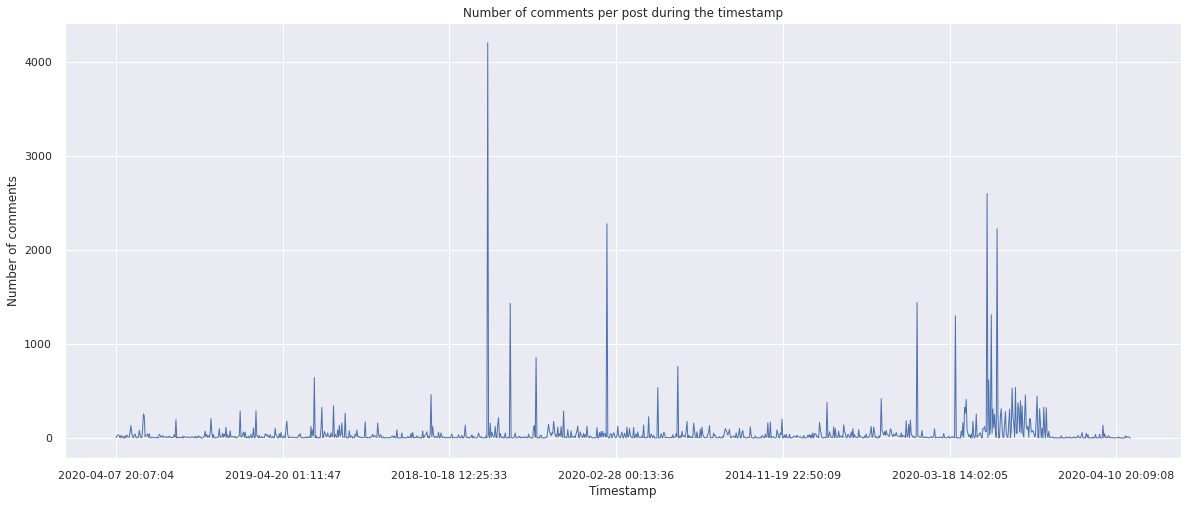

In [30]:
sns.set(rc={'figure.figsize':(20, 8)})
df4['comms_num'].plot(linewidth=1);
plt.title("Number of comments per post during the timestamp")
plt.xlabel("Timestamp")
plt.ylabel("Number of comments")
plt.savefig('no of comments per time stamp.png')
plt.show()

score per post during the time stamp

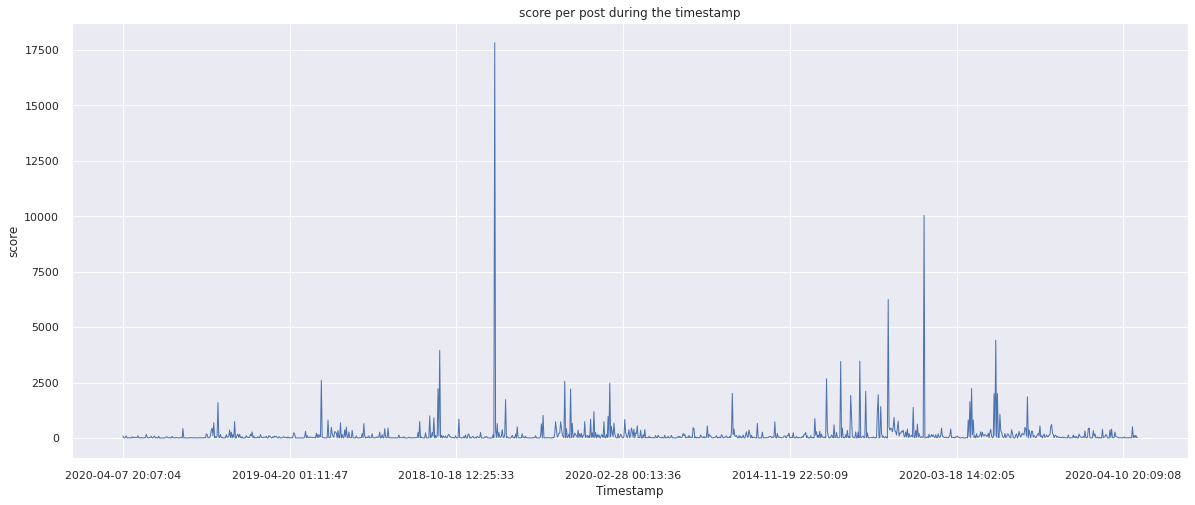

In [31]:
sns.set(rc={'figure.figsize':(20, 8)})
df4['score'].plot(linewidth=1);
plt.title("score per post during the timestamp")
plt.xlabel("Timestamp")
plt.ylabel("score")
plt.savefig('score per post during time stamp.png')
plt.show()

In [0]:
df1=df.set_index('timestamp')

In [33]:
df2= df1.groupby('flair')[['comms_num']]
df2.head()

,comms_num
timestamp,
2020-04-07 20:07:04,6
2020-03-15 18:48:06,19
2020-02-11 17:10:55,31
2019-11-09 20:57:35,34
2019-04-01 01:00:35,24
...,...
2020-04-13 14:47:19,5
2020-04-13 17:00:44,71
2020-04-13 23:46:28,10


Number of comments per post during the timestamp corresponding to the flairs

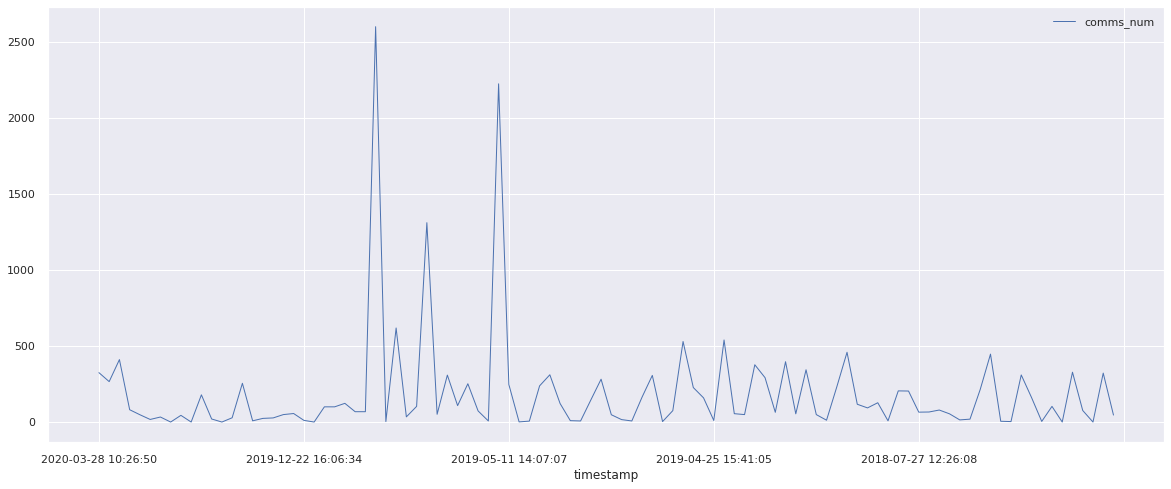

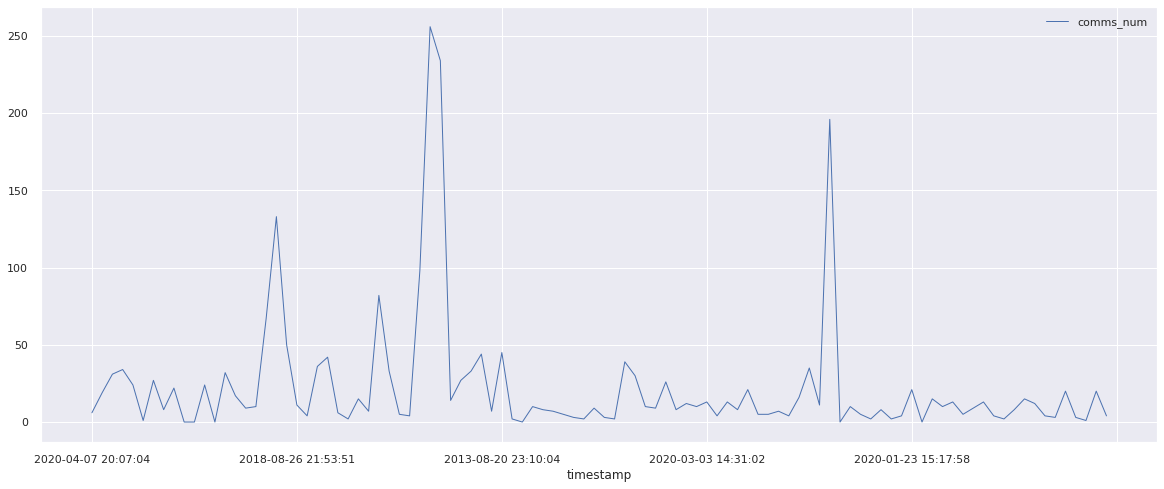

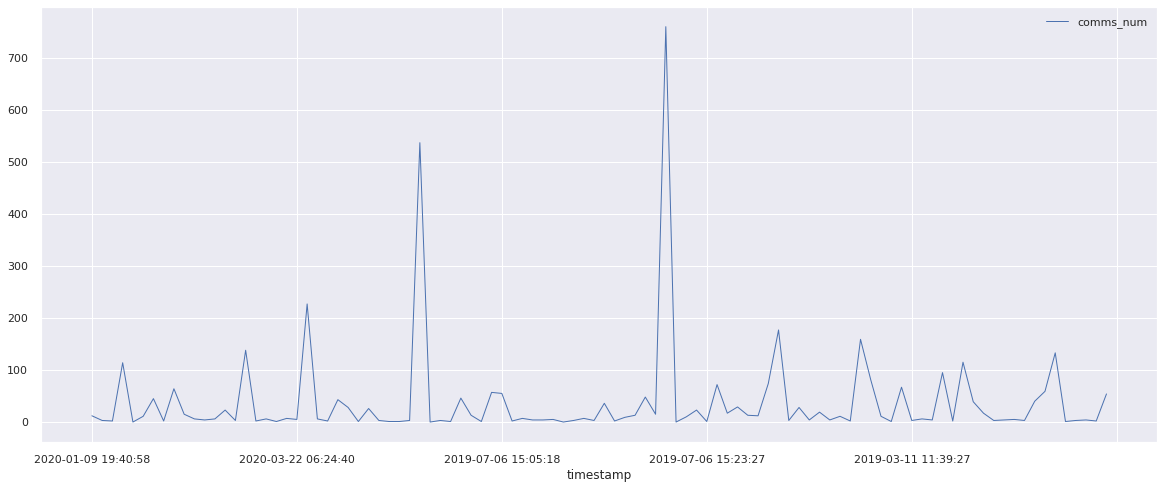

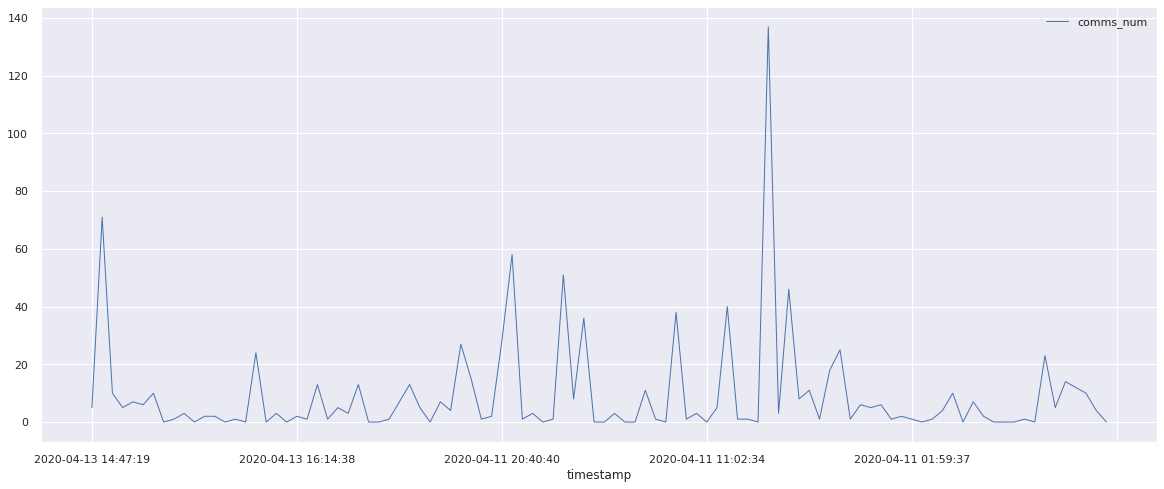

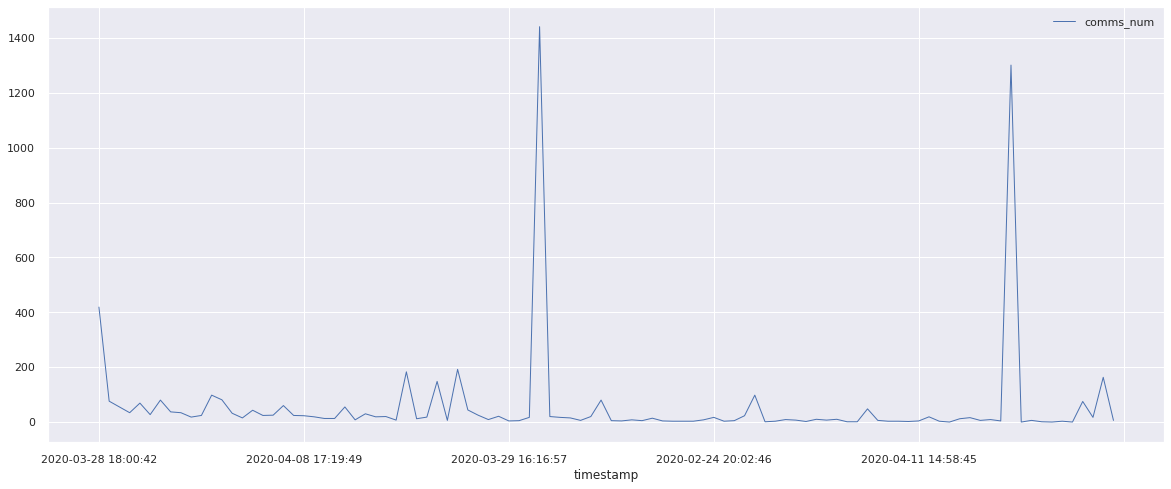

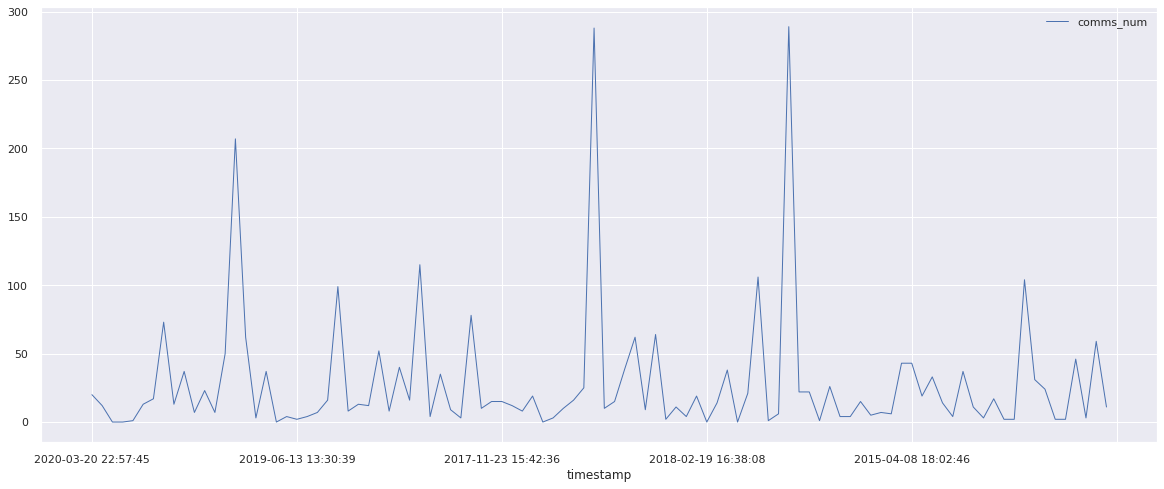

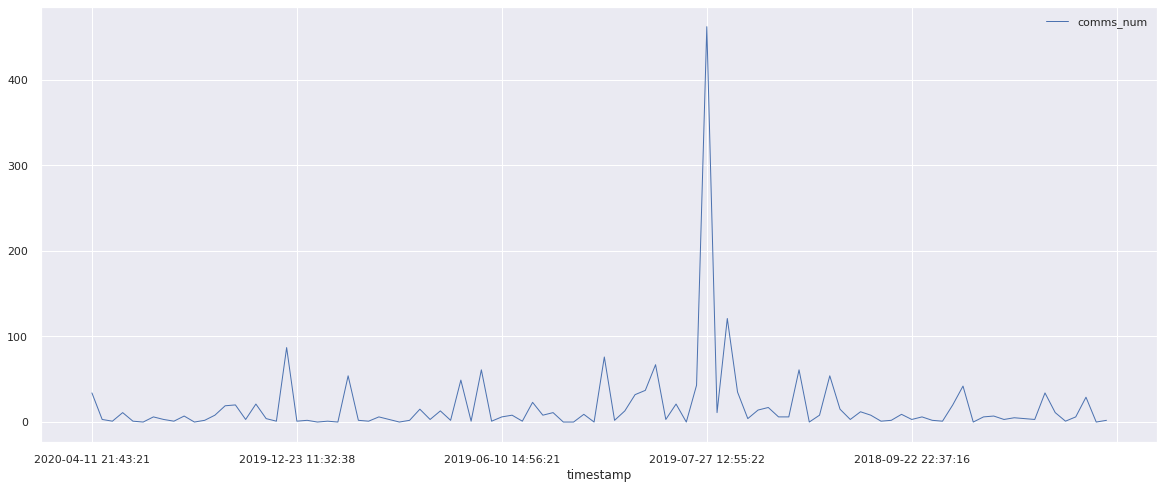

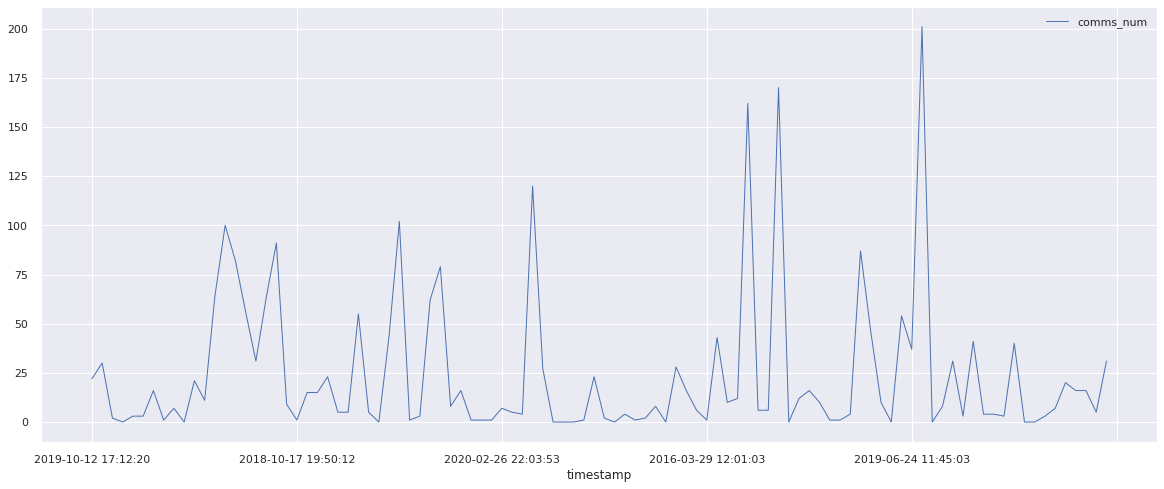

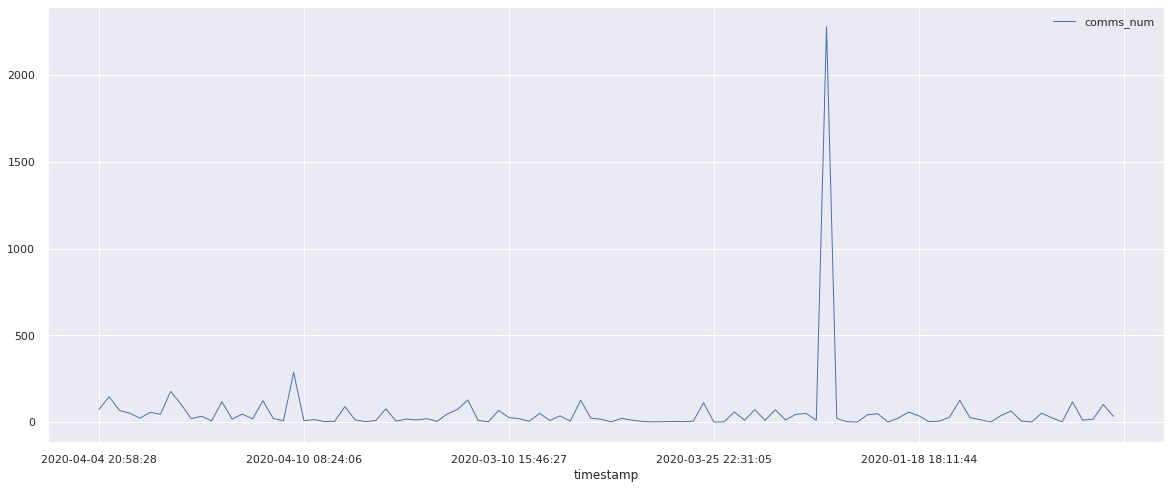

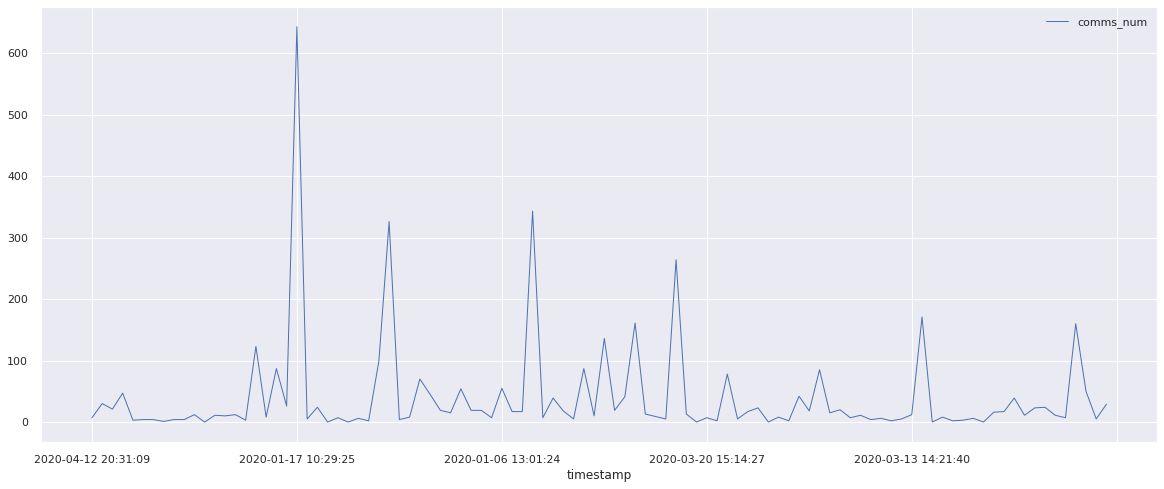

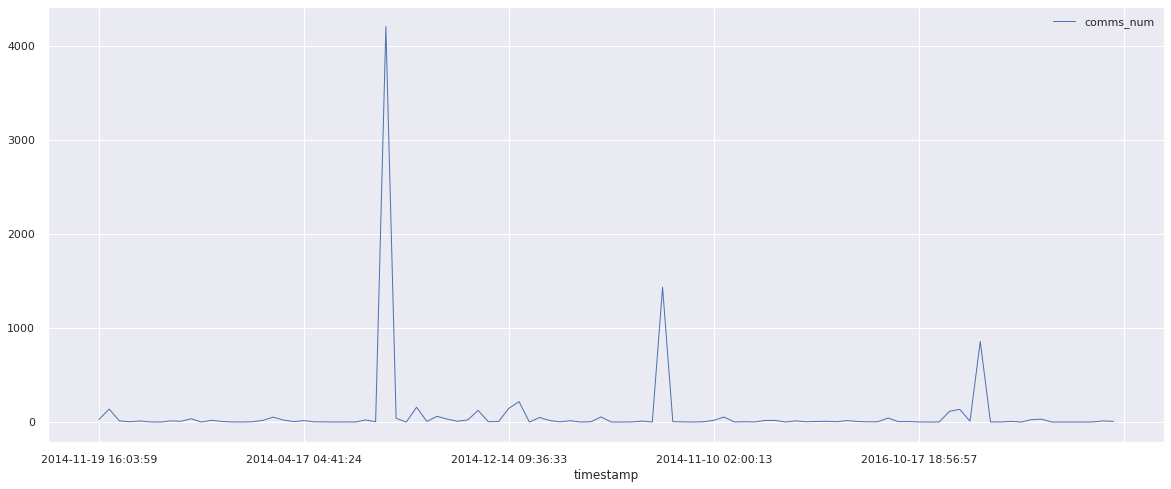

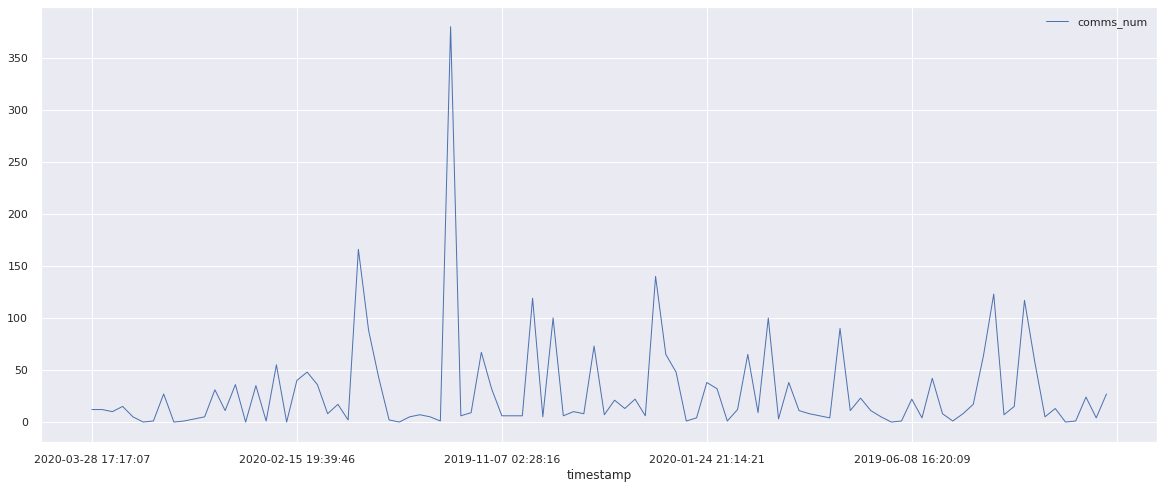

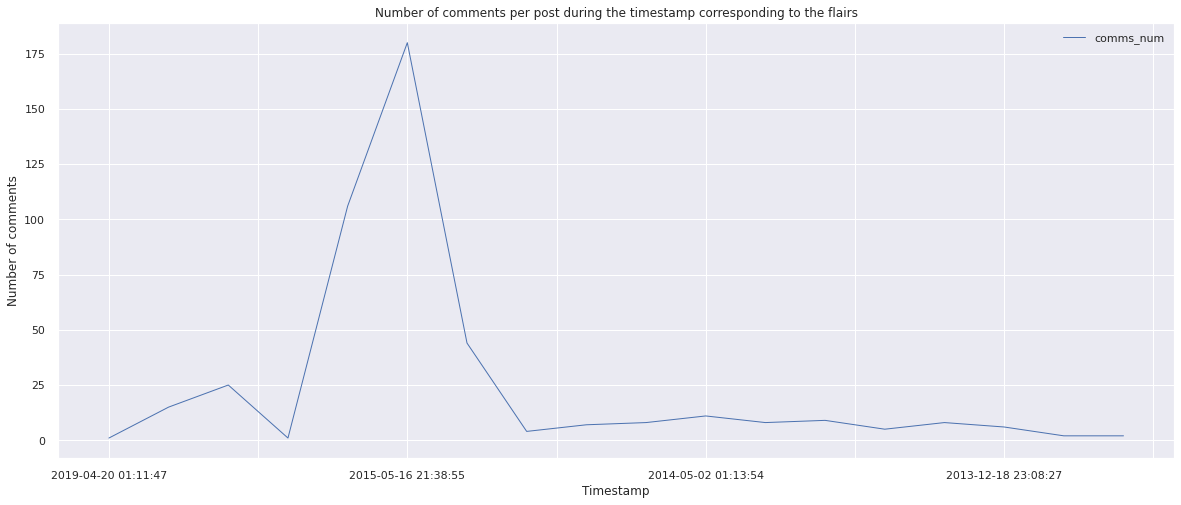

In [34]:
sns.set(rc={'figure.figsize':(20, 8)})
df1.groupby('flair')[['comms_num']].plot(linewidth=1);
plt.title("Number of comments per post during the timestamp corresponding to the flairs")
plt.xlabel("Timestamp")
plt.ylabel("Number of comments")
plt.savefig('no of comments per time stamp corresponding to the flairs.png')
plt.show()

## Let's see different word embeddings and how the word from the corpus cluster

In [0]:
z=df['flair'].unique()

In [0]:
df['body'].fillna(" ",inplace=True)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

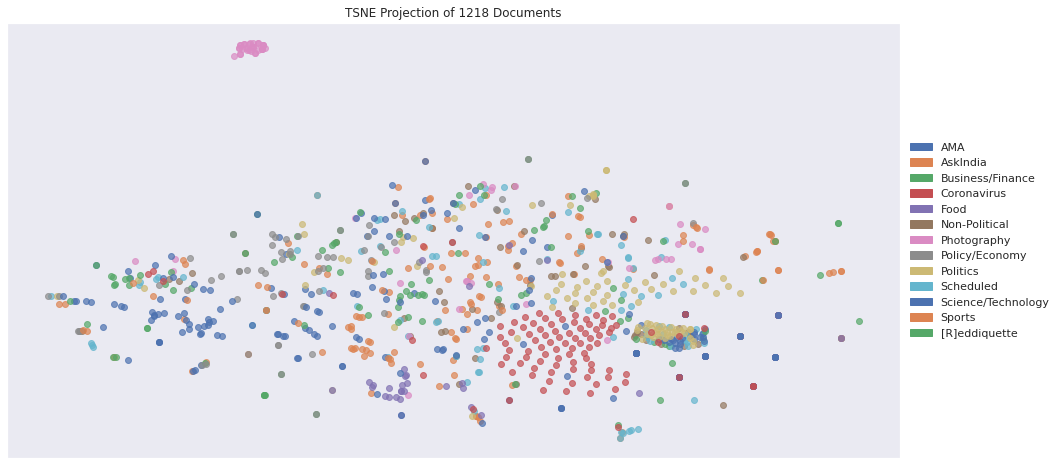

In [37]:

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['body'])
y = df['flair']
tsne = TSNEVisualizer(labels=z)
tsne.fit(x, y)
tsne.poof()

By this we can see words in body don't cluster much together according to the flair but politics is clustered around probably because mentioning bjp, congress and other parties and personnel

for comments



In [0]:
df['comments'].fillna(" ",inplace=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

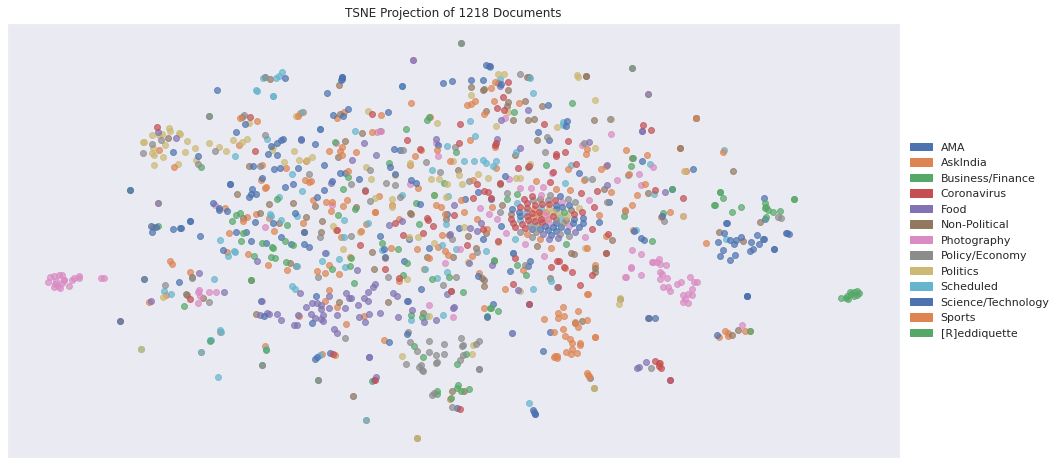

In [39]:

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['comments'])
y = df['flair']
tsne = TSNEVisualizer(labels=z)
tsne.fit(x, y)
tsne.poof()

comments are scattered all around the vector space

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

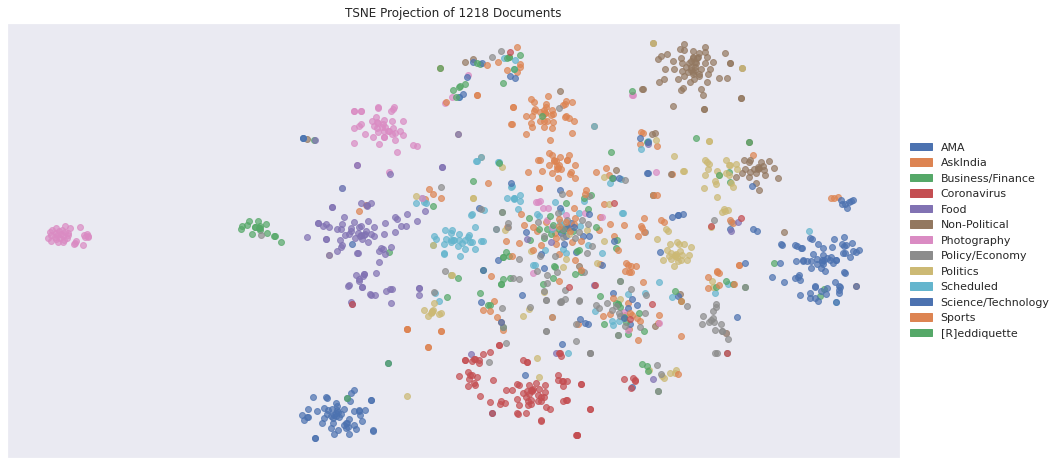

In [40]:

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['title'])
y = df['flair']
tsne = TSNEVisualizer(labels=z)
tsne.fit(x, y)
tsne.poof()

titles are clustered according to the flair thus title is an important parameter

combined features

In [0]:

df['combined_features'].fillna(" ",inplace=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

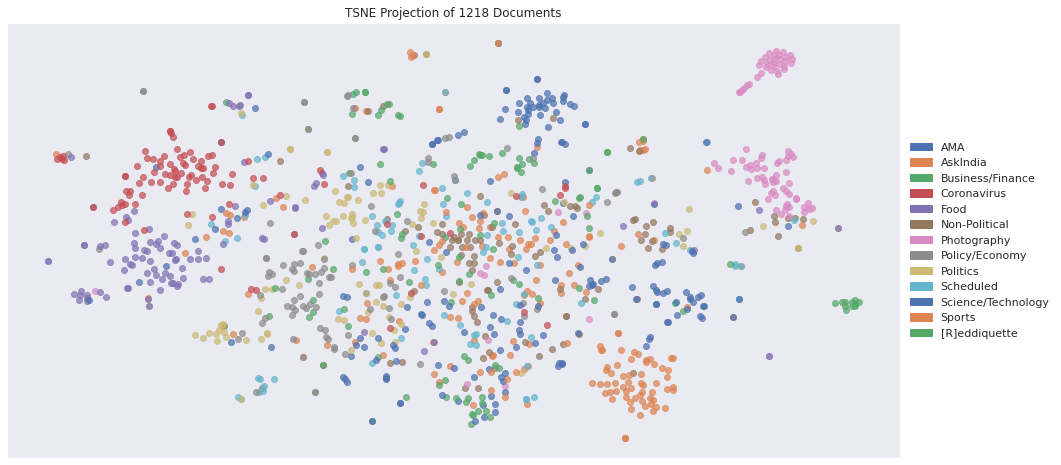

In [42]:

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['combined_features'])
y = df['flair']
tsne = TSNEVisualizer(labels=z)
tsne.fit(x, y)
tsne.poof()

by looking at all the features they are also scattered yet large clusters can be formed this shows combined features work fine after title thus can be used for model

## now let's look at the last part of our analysis what is the frequency of different words in the comments, body, title etc and which is the word used the most

In [0]:
stopwords = set(stopwords.words('english'))

words appearing maximum times in body

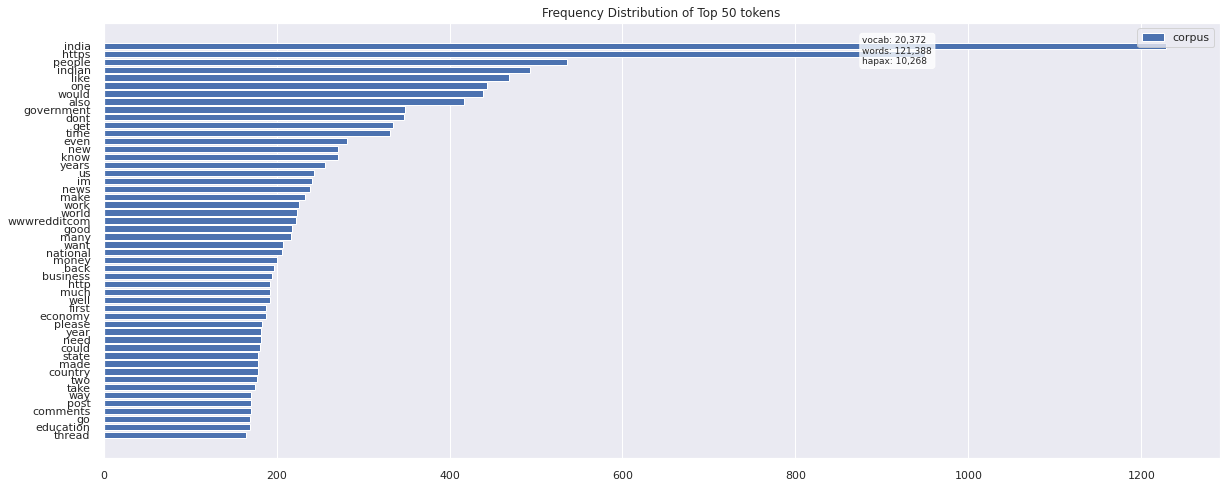

In [45]:
vectorizer = CountVectorizer(stop_words=stopwords)
docs = vectorizer.fit_transform(df['body'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

thus India, Indian and economy government occurs many times 

for title 

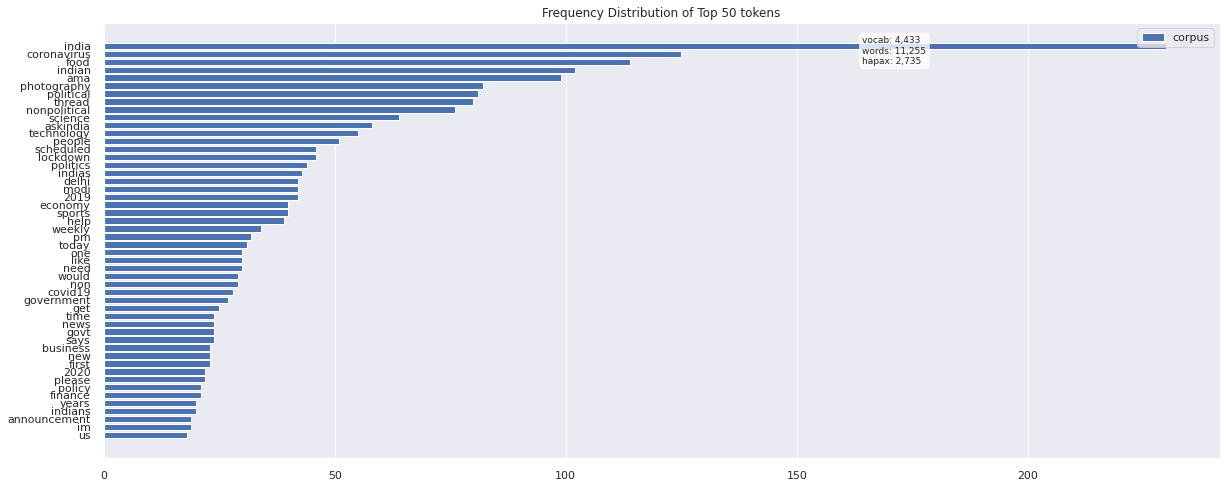

In [46]:
vectorizer = CountVectorizer(stop_words=stopwords)
docs = vectorizer.fit_transform(df['title'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

in title along with india corona virus, modi, pm , science occurs the most

in comments

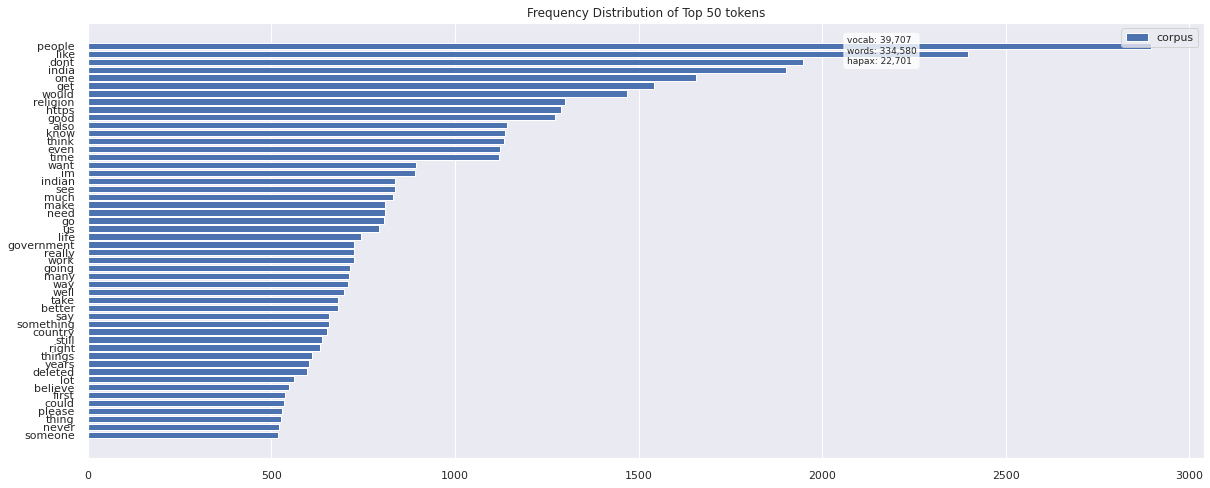

In [47]:
vectorizer = CountVectorizer(stop_words=stopwords)
docs = vectorizer.fit_transform(df['comments'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

there is much about religion in comments might be because of people in India are most inclined to religion etc

combined features

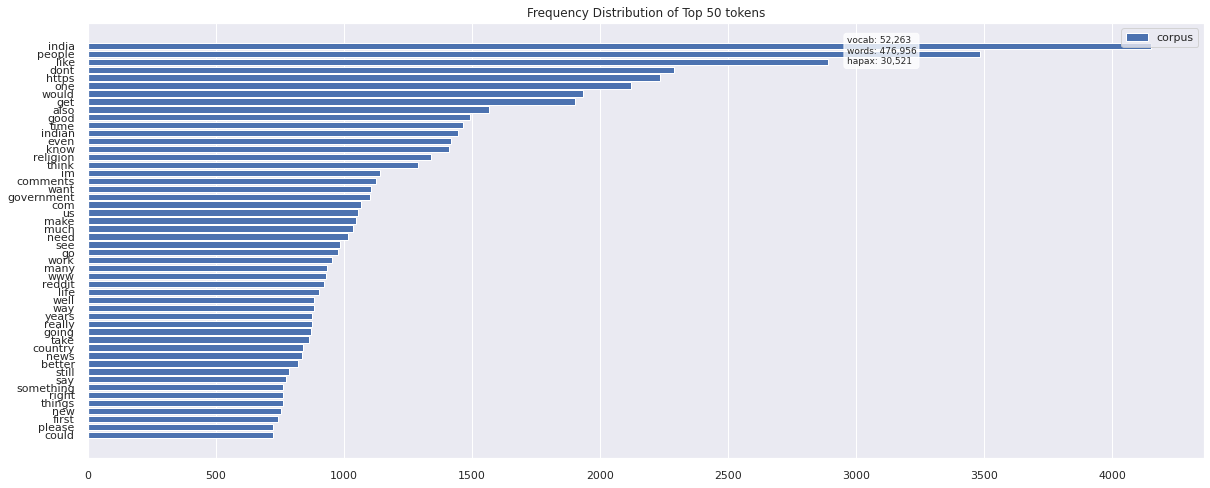

In [48]:
vectorizer = CountVectorizer(stop_words=stopwords)
docs = vectorizer.fit_transform(df['combined_features'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

in combined features as well india and religion are predominant

## here is the end of analysis now we move on to model